In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets.folder import default_loader
#在jupyter notebook中显示图片
%matplotlib inline 


<PIL.Image.Image image mode=RGB size=554x388 at 0x20C654E3760>


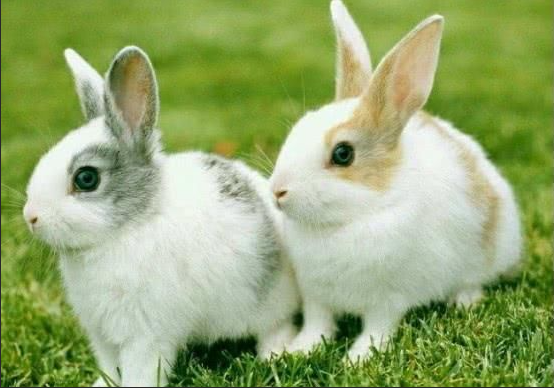

In [27]:
img_path = "./img/rabbit.jpg"
x = default_loader(img_path)
print(x)
x

## 定义transform和对应的图片情况
## 初级版

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(), #将图片变成 Tensor
])

img = transform(x)
print(img.size())
img


torch.Size([3, 388, 554])


tensor([[[0.1647, 0.4078, 0.4078,  ..., 0.4627, 0.4627, 0.4706],
         [0.1647, 0.4157, 0.4157,  ..., 0.4627, 0.4667, 0.4706],
         [0.1647, 0.4275, 0.4275,  ..., 0.4667, 0.4706, 0.4706],
         ...,
         [0.1608, 0.1882, 0.2039,  ..., 0.4549, 0.3725, 0.3529],
         [0.1608, 0.2275, 0.2157,  ..., 0.4157, 0.2941, 0.3529],
         [0.1608, 0.1608, 0.1569,  ..., 0.1569, 0.1569, 0.1569]],

        [[0.1647, 0.5529, 0.5529,  ..., 0.5569, 0.5490, 0.5412],
         [0.1647, 0.5529, 0.5529,  ..., 0.5569, 0.5529, 0.5412],
         [0.1647, 0.5608, 0.5608,  ..., 0.5608, 0.5569, 0.5412],
         ...,
         [0.1608, 0.3922, 0.4000,  ..., 0.5922, 0.4941, 0.4627],
         [0.1608, 0.4314, 0.4118,  ..., 0.5529, 0.4157, 0.4627],
         [0.1608, 0.1608, 0.1569,  ..., 0.1569, 0.1569, 0.1569]],

        [[0.1647, 0.1451, 0.1451,  ..., 0.1765, 0.2000, 0.2353],
         [0.1647, 0.1529, 0.1529,  ..., 0.1765, 0.2039, 0.2353],
         [0.1647, 0.1647, 0.1647,  ..., 0.1804, 0.2078, 0.

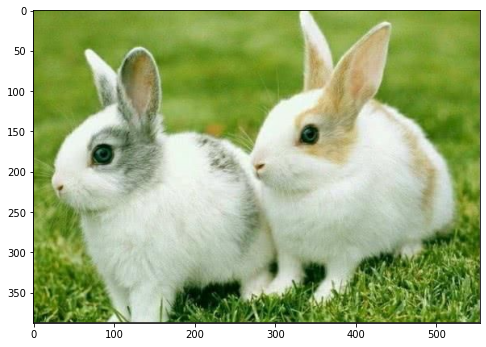

In [29]:
plt.figure(figsize=(8,8))
img = transform(x)
img = img.numpy().transpose((1,2,0))
img = np.clip(img,0,1)
plt.imshow(img)


## 中级版 - 归一化
然后，尝试加入transforms.Normalize()

In [30]:
transform = transforms.Compose([
    transforms.ToTensor(), #将图片变成 Tensor，并且把数值normalize到[0,1]
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])#mean,std
])

img = transform(x)
print(img.size())
img


torch.Size([3, 388, 554])


tensor([[[-1.3987, -0.3369, -0.3369,  ..., -0.0972, -0.0972, -0.0629],
         [-1.3987, -0.3027, -0.3027,  ..., -0.0972, -0.0801, -0.0629],
         [-1.3987, -0.2513, -0.2513,  ..., -0.0801, -0.0629, -0.0629],
         ...,
         [-1.4158, -1.2959, -1.2274,  ..., -0.1314, -0.4911, -0.5767],
         [-1.4158, -1.1247, -1.1760,  ..., -0.3027, -0.8335, -0.5767],
         [-1.4158, -1.4158, -1.4329,  ..., -1.4329, -1.4329, -1.4329]],

        [[-1.3004,  0.4328,  0.4328,  ...,  0.4503,  0.4153,  0.3803],
         [-1.3004,  0.4328,  0.4328,  ...,  0.4503,  0.4328,  0.3803],
         [-1.3004,  0.4678,  0.4678,  ...,  0.4678,  0.4503,  0.3803],
         ...,
         [-1.3179, -0.2850, -0.2500,  ...,  0.6078,  0.1702,  0.0301],
         [-1.3179, -0.1099, -0.1975,  ...,  0.4328, -0.1800,  0.0301],
         [-1.3179, -1.3179, -1.3354,  ..., -1.3354, -1.3354, -1.3354]],

        [[-1.0724, -1.1596, -1.1596,  ..., -1.0201, -0.9156, -0.7587],
         [-1.0724, -1.1247, -1.1247,  ..., -1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


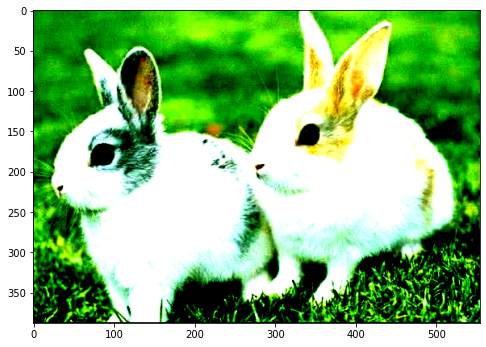

In [31]:
plt.figure(figsize=(8,8))
img = transform(x)
img=img.numpy().transpose((1,2,0))
#img = np.clip(img,0,1)
plt.imshow(img)


看起来像是曝光过度的图片，把它还原成正常图片

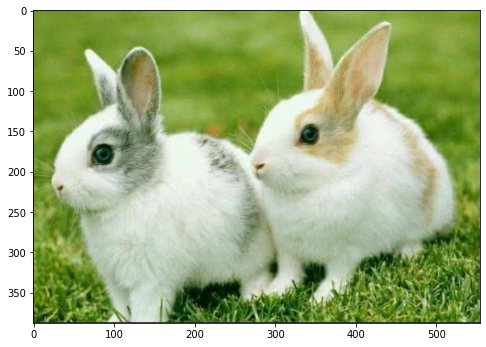

In [32]:
plt.figure(figsize=(8,8))
img = transform(x)
img=img.numpy().transpose((1,2,0))
mean = np.array([0.485,0.456,0.406])
std = np.array([0.229,0.224,0.225])
img = std*img+mean
#numpy.clip(a, a_min, a_max, out=None)
img = np.clip(img,0,1)
plt.imshow(img)


## 中级版 - 翻转与旋转
继续加入随机翻转 transforms.RandomHorizontalFlip()、随机旋转transforms.RandomRotation() 的操作。

In [33]:
transform = transforms.Compose([
    #transforms.ToPILImage(), # 如果是numpy请取消注释
    transforms.RandomHorizontalFlip(), #随机翻转图片
    transforms.RandomRotation(15), #随机旋转图片
    transforms.ToTensor(), #将图片变成 Tensor，并且把数值normalize到[0,1]
])

img = transform(x)
print(img.size())
img


torch.Size([3, 388, 554])


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

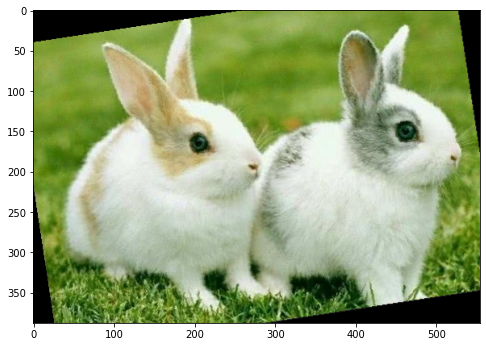

In [34]:
# 多次运行此部分代码，可实现多次随机
plt.figure(figsize=(8,8))
img = transform(x)
img=img.numpy().transpose((1,2,0))
img = np.clip(img,0,1)
plt.imshow(img)


## 中级版 - 调整亮度、灰度、饱和度、对比度
brightness是亮度，contrast是对比度，saturation是饱和度，hue是色调

In [35]:
transform = transforms.Compose([
    # transforms.ToPILImage(), # 如果是numpy请取消注释
#     transforms.RandomHorizontalFlip(), #随机翻转图片
#     transforms.RandomRotation(15), #随机旋转图片
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomGrayscale(),
    transforms.ToTensor(), #将图片变成 Tensor，并且把数值normalize到[0,1]    
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img = transform(x)
print(img.size())
img


torch.Size([3, 388, 554])


tensor([[[0.1765, 0.3333, 0.3333,  ..., 0.3765, 0.3804, 0.3961],
         [0.1765, 0.3373, 0.3373,  ..., 0.3765, 0.3843, 0.3961],
         [0.1765, 0.3529, 0.3529,  ..., 0.3804, 0.3882, 0.3961],
         ...,
         [0.1765, 0.1569, 0.1765,  ..., 0.3804, 0.3137, 0.3020],
         [0.1765, 0.1882, 0.1843,  ..., 0.3451, 0.2510, 0.3020],
         [0.1765, 0.1765, 0.1725,  ..., 0.1725, 0.1725, 0.1725]],

        [[0.1765, 0.5020, 0.5020,  ..., 0.5059, 0.4980, 0.4902],
         [0.1765, 0.5020, 0.5020,  ..., 0.5059, 0.5020, 0.4902],
         [0.1765, 0.5059, 0.5059,  ..., 0.5059, 0.5059, 0.4902],
         ...,
         [0.1765, 0.3686, 0.3725,  ..., 0.5333, 0.4510, 0.4235],
         [0.1765, 0.4000, 0.3804,  ..., 0.5020, 0.3843, 0.4235],
         [0.1765, 0.1765, 0.1725,  ..., 0.1725, 0.1725, 0.1725]],

        [[0.1765, 0.1569, 0.1569,  ..., 0.1843, 0.2039, 0.2314],
         [0.1765, 0.1647, 0.1647,  ..., 0.1843, 0.2118, 0.2314],
         [0.1765, 0.1765, 0.1765,  ..., 0.1882, 0.2118, 0.

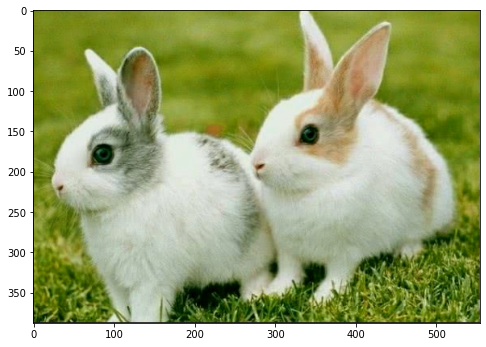

In [36]:
plt.figure(figsize=(8,8))
img = transform(x)
img=img.numpy().transpose((1,2,0))
# img = np.clip(img,0,1)
plt.imshow(img)


## 高级版
说是高级版，实际上是把所有东西都混合进来

In [37]:
transform = transforms.Compose([
    # transforms.ToPILImage(), # 如果是numpy请取消注释
    transforms.RandomHorizontalFlip(), #随机翻转图片
    transforms.RandomRotation(15), #随机旋转图片
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomGrayscale(),
    transforms.ToTensor(), #将图片变成 Tensor，并且把数值normalize到[0,1]    
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img = transform(x)
print(img.size())
img


torch.Size([3, 388, 554])


tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


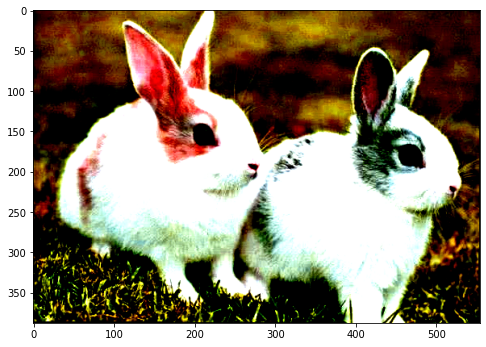

In [38]:
plt.figure(figsize=(8,8))
img = transform(x)
img=img.numpy().transpose((1,2,0))
# img = np.clip(img,0,1)
plt.imshow(img)


### 1.随机裁剪：transforms.RandomCrop
* class torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode=‘constant’)
* 功能：依据给定的size随机裁剪
* 参数：
 * size- (sequence or int)，若为sequence,则为(h,w)，若为int，则(size,size)
 * padding-(sequence or int, optional)，此参数是设置填充多少个pixel。
 * 当为int时，图像上下左右均填充int个，例如padding=4，则上下左右均填充4个pixel，若为3232，则会变成4040。
 * 当为sequence时，若有2个数，则第一个数表示左右扩充多少，第二个数表示上下的。当有4个数时，则为左，上，右，下。
 * fill- (int or tuple) 填充的值是什么（仅当填充模式为constant时有用）。int时，各通道均填充该值，当长度为3的tuple时，表示RGB通道需要填充的值。
 * padding_mode- 填充模式，这里提供了4种填充模式，1.constant，常量。2.edge 按照图片边缘的像素值来填充。3.reflect，以矩阵边缘为对称轴。 4. symmetric，暂不了解。

In [39]:
transform = transforms.Compose([
    transforms.RandomCrop((200,200)),
    transforms.ToTensor()
])
print(x.size)
img = transform(x)
print(img.size())
img

(554, 388)
torch.Size([3, 200, 200])


tensor([[[0.3569, 0.3451, 0.3490,  ..., 0.9373, 0.9137, 0.9216],
         [0.3451, 0.3373, 0.3373,  ..., 0.9490, 0.9176, 0.9216],
         [0.3725, 0.3608, 0.3569,  ..., 0.8902, 0.9098, 0.9333],
         ...,
         [0.6824, 0.6902, 0.7137,  ..., 0.5647, 0.5686, 0.7255],
         [0.6941, 0.7059, 0.7333,  ..., 0.5608, 0.5176, 0.6275],
         [0.7059, 0.7176, 0.7451,  ..., 0.5216, 0.5098, 0.4902]],

        [[0.4627, 0.4510, 0.4588,  ..., 0.9412, 0.9176, 0.9294],
         [0.4431, 0.4392, 0.4431,  ..., 0.9529, 0.9255, 0.9294],
         [0.4588, 0.4510, 0.4510,  ..., 0.8980, 0.9216, 0.9490],
         ...,
         [0.7137, 0.7255, 0.7569,  ..., 0.7176, 0.7137, 0.8667],
         [0.7255, 0.7412, 0.7686,  ..., 0.7176, 0.6745, 0.7843],
         [0.7373, 0.7529, 0.7804,  ..., 0.6824, 0.6745, 0.6588]],

        [[0.0510, 0.0392, 0.0471,  ..., 0.9451, 0.9216, 0.9216],
         [0.0353, 0.0314, 0.0353,  ..., 0.9373, 0.9137, 0.9137],
         [0.0627, 0.0549, 0.0549,  ..., 0.8588, 0.8863, 0.

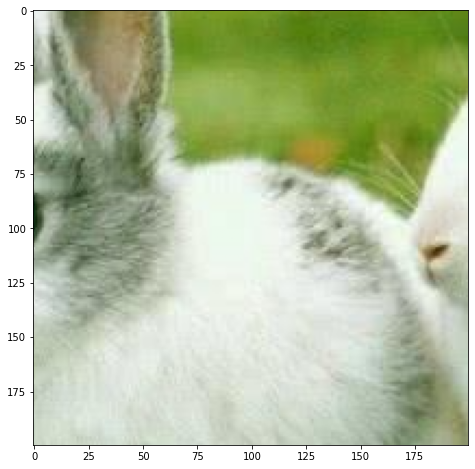

In [40]:
plt.figure(figsize=(8,8))
img = transform(x)
img=img.numpy().transpose((1,2,0))
# img = np.clip(img,0,1)
plt.imshow(img)

### 2.中心裁剪：transforms.CenterCrop
* class torchvision.transforms.CenterCrop(size)
* 功能：依据给定的size从中心裁剪
* 参数：
* size- (sequence or int)，若为sequence,则为(h,w)，若为int，则(size,size)

(554, 388)
torch.Size([3, 100, 100])


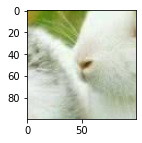

In [51]:
transform = transforms.Compose([
    transforms.CenterCrop((100,100)),
    transforms.ToTensor()
])
print(x.size)
img = transform(x)
print(img.size())
img

plt.figure(figsize=(2,2))
img = transform(x)
img=img.numpy().transpose((1,2,0))
# img = np.clip(img,0,1)
plt.imshow(img)

### 3.随机长宽比裁剪 transforms.RandomResizedCrop
* class torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
* 功能：随机大小，随机长宽比裁剪原始图片，最后将图片resize到设定好的size
*参数：
 * size- 输出的分辨率
 * scale- 随机crop的大小区间，如scale=(0.08, 1.0)，表示随机crop出来的图片会在的0.08倍至1倍之间。
 * ratio- 随机长宽比设置
 * interpolation- 插值的方法，默认为双线性插值(PIL.Image.BILINEAR)

In [63]:
transform = transforms.Compose([
    transforms.RandomResizedCrop((277,169)),
    transforms.ToTensor()
])
print(x.size)
img = transform(x)
print(img.size())

(554, 388)
torch.Size([3, 277, 169])


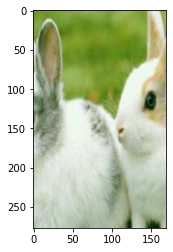

In [70]:
plt.figure(figsize=(4,4))
img = transform(x)
img=img.numpy().transpose((1,2,0))
# img = np.clip(img,0,1)
plt.imshow(img)

### 4.上下左右中心裁剪：transforms.FiveCrop
* class torchvision.transforms.FiveCrop(size)
* 功能：对图片进行上下左右以及中心裁剪，获得5张图片，返回一个4D-tensor
* 参数：
* size- (sequence or int)，若为sequence,则为(h,w)，若为int，则(size,size)


In [71]:
transform = transforms.Compose([
    transforms.FiveCrop((277,169)),
    transforms.ToTensor()
])
print(x.size)
img = transform(x)
print(img.size())

(554, 388)


TypeError: pic should be PIL Image or ndarray. Got <class 'tuple'>